**DAEGU APARTMENT PRICE PREDICTION**

[Source Database](https://drive.google.com/file/d/1nKYp9cvJsCzr8bbKN94hR0z-nODAJjz4/view?usp=drive_link)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

# **BUSINESS PROBLEM UNDERSTANDING**

## Context

Apartments serve as a primary solution to housing needs in urban environments, especially due to limited land availability and high levels of business activity. Apartment prices are significantly influenced by various internal factors (e.g., size, facilities within the apartment) and external factors (e.g., proximity to public facilities and transportation). The goal of this analysis is to understand and predict apartment prices to help property owners and buyers set prices that align with market conditions

## Problem Statements

Apartment owners face challenges in setting competitive selling prices. Overpricing can hinder sales, while underpricing reduces potential profit. By accurately predicting apartment prices, market participants can make better-informed decisions.

## Goals

1. Develop a predictive model for apartment prices using relevant features from the dataset.

2. Identify key features that influence apartment prices.

3. Provide optimal pricing recommendations for property sales or investment purposes

## Analytic Approaches

1. Data Preparation: Clean the dataset, handle missing values, and encode categorical variables.

2. Exploratory Data Analysis (EDA): Explore the relationships between features such as apartment size, facilities, and accessibility, and their impact on prices.

3. Modeling: Build regression models using various model including linear model (Linear Regression, Ridge, Lasso) and Tree-based regressors (Decission Tree Regressor, Random Forest Regressors, XGBoost Regressors)

4. Evaluation: Compare model performance based on evaluation metrics such as MAE, MSE, and R² Score.

# **DATA UNDERSTANDING AND DATA CLEANING**

## IMPORTING THE DATABASE

In this, I will use the dataset from Google Drive.

We create first the code to access the dataset from GDrive

In [1]:
import gdown
from io import BytesIO

In [2]:
# Google Drive link
url = "https://drive.google.com/file/d/1nKYp9cvJsCzr8bbKN94hR0z-nODAJjz4/view?usp=drive_link"

# Extracting file ID from URL
# File ID usually between the /d and /

file_id = url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# TEMPORARY FILE

output = "temp_dataset.csv"

# SAVING FILE TO LOCAL DIRECTORY
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nKYp9cvJsCzr8bbKN94hR0z-nODAJjz4
To: /content/temp_dataset.csv
100%|██████████| 283k/283k [00:00<00:00, 66.8MB/s]


'temp_dataset.csv'

In [3]:
# IMPORTING USEABLE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# IMPORTING THE DATABASE

apartment_data = pd.read_csv(output)

display(apartment_data.head(),apartment_data.tail())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451
4122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,250442


## CHECKING THE DATABASE DIMENSIONS

In [5]:
# CHECKING THE SHAPE OF THE DATASET

print(f'Number of rows in the database :  {apartment_data.shape}')
apartment_data.info()

Number of rows in the database :  (4123, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4),

***Database understanding***

**INFORMATION REGARDING FEATURES IN DATASET :**


***1. TimeToSubway:*** Distance to a subway station is critical, as public transportation accessibility increases property value.

***2. N_FacilitiesNearBy (ETCPublicOffice):*** Proximity to public facilities, such as shopping centers, or recreation areas.

***3. N_FacilitiesNearBy (PublicOffice):*** Proximity to public facilities, such as public offices.

***4. N_SchoolNearBy (University):*** The presence of a university near the apartment attracts buyers, especially families with children.

***5. N_FacilitiesInApt:*** Internal amenities (gym, swimming pool, etc.) can increase the comfort and value of the apartment.

***6. Size (sqft):*** The size of the apartment, can be directly related to the value of the property.

***7. YearBuilt:*** The age of a building influences the perception of a property's physical quality, with newer buildings typically being more valuable.

***8. N_Parkinglot (Basement):*** The availability of parking, especially in dense urban areas, is a significant plus.

***9. Hallway Type :*** type of the apartments, like terrace, mixed, corridor

***10. Subwaystation :*** contains the name of subway station near the apartment

***11. SalePrice :*** price of the apartments

## *Check for Missing Values*

In [6]:
# CALCULATE NUMBER OF MISSING VALUES

def missingvalues_calculation(datasets):
  number_missing = datasets.isnull().sum()

  percentage_missing = datasets.isna().sum()/datasets.shape[0]*100

  missing_values = pd.concat([number_missing, percentage_missing], axis = 1)
  missing_values.columns = ['Number_Missing', 'Percentage_Missing']

  return missing_values

In [7]:
missingvalues_calculation(apartment_data)

,Number_Missing,Percentage_Missing
HallwayType,0,0.0
TimeToSubway,0,0.0
SubwayStation,0,0.0
N_FacilitiesNearBy(ETC),0,0.0
N_FacilitiesNearBy(PublicOffice),0,0.0
N_SchoolNearBy(University),0,0.0
N_Parkinglot(Basement),0,0.0
YearBuilt,0,0.0
N_FacilitiesInApt,0,0.0
Size(sqf),0,0.0


Luckily for us, we don't have any missing values that need to be imputed for the dataset

## *Check for Duplicates*

In [8]:
# Counting the number of duplicates
num_duplicates = apartment_data.duplicated().sum()

print(f"Number of duplicates in dataset : {num_duplicates}")

Number of duplicates in dataset : 1422


We observe, there are 1422 duplicates, which takes about 34% of total data.

We can' simply delete these duplicates, we need to check the effect of these duplicates first.

We will check, if deleting duplicates will affecting the distribution or price or not.

If it's affecting the distribution, we will keep them.

However, if there's no impact to normality and distribution, we will delete them. Deleting the duplicates will help us to perform machine learning efficiently since the duplicates contain the same information and tend to redundancy.


In [9]:
# import libaries for plotting and normality check
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [10]:
# Drop duplicates
apartment_no_duplicates = apartment_data.drop_duplicates()

# Function to check normality and distribution plot

# We can check the effect of duplicates to the distribution and normality of certain features.

# Maybe the most important one is to check the effect to the price

def compare_distributions(column_name):
    # Data with duplicates
    data_with_duplicates = apartment_data[column_name]

    # Data without duplicates
    data_no_duplicates = apartment_no_duplicates[column_name]

    # Visualize the distribution
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data_with_duplicates, label="With Duplicates", color='blue', shade=True)
    sns.kdeplot(data_no_duplicates, label="Without Duplicates", color='orange', shade=True)
    plt.title(f"Distribution Comparison: {column_name}")
    plt.legend()
    plt.show()

    # Normality check with shapiro-wick test
    stat_with, p_with = shapiro(data_with_duplicates)
    stat_without, p_without = shapiro(data_no_duplicates)

    print(f"Shapiro Test for {column_name} (With Duplicates): Statistic={stat_with:.4f}, p-value={p_with:.4f}")
    print(f"Shapiro Test for {column_name} (Without Duplicates): Statistic={stat_without:.4f}, p-value={p_without:.4f}")

    if p_with > 0.05:
        print("Data with duplicates appears to follow a normal distribution (fail to reject H0).")
    else:
        print("Data with duplicates does not follow a normal distribution (reject H0).")

    if p_without > 0.05:
        print("Data without duplicates appears to follow a normal distribution (fail to reject H0).")
    else:
        print("Data without duplicates does not follow a normal distribution (reject H0).")




<ipython-input-10-397a11c29da1>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_with_duplicates, label="With Duplicates", color='blue', shade=True)
<ipython-input-10-397a11c29da1>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_no_duplicates, label="Without Duplicates", color='orange', shade=True)


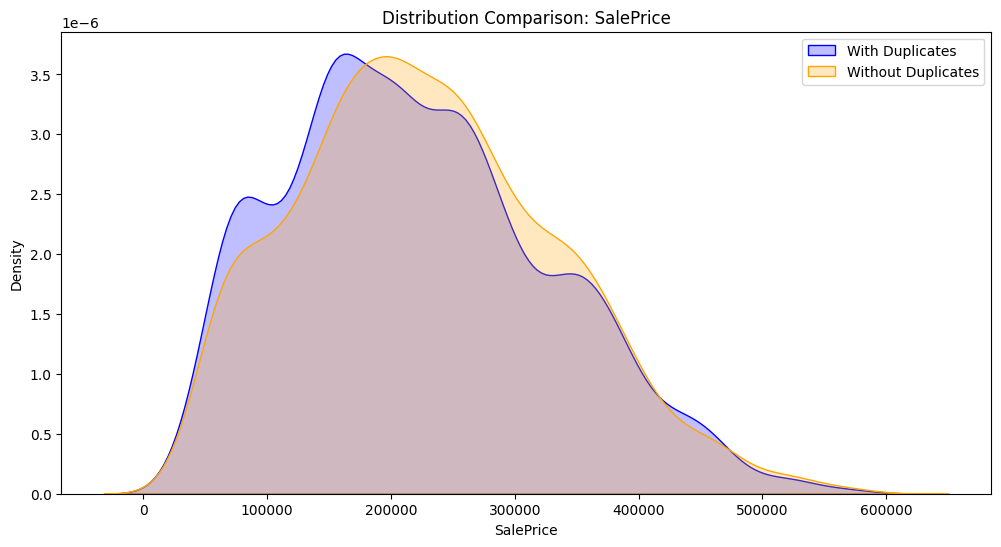

Shapiro Test for SalePrice (With Duplicates): Statistic=0.9756, p-value=0.0000
Shapiro Test for SalePrice (Without Duplicates): Statistic=0.9829, p-value=0.0000
Data with duplicates does not follow a normal distribution (reject H0).
Data without duplicates does not follow a normal distribution (reject H0).


In [11]:
compare_distributions("SalePrice")

From the data checking, we can see that both with or without duplicates result in NOT NORMAL DISTRIBUTED data. Hence **no change in normality when dropping the duplicates**



**However**, when we compared the two datasets, we can see that **dataset without duplicates shows more evenly distributed data**

Hence ***we will drop the duplicates, and use this dataset for further modelling***

In [13]:
# SAVING DATA WITHOUT DUPLICATES AS NEW DATAFRAME

df_apartment = apartment_data.drop_duplicates()

## Checking for Anomalies

Check for size and summary

In [14]:
df_apartment.shape

(2701, 11)

In [15]:
# CHECKING THE SHAPE OF THE DATASET

df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


**Descriptive statistics for the dataset**

In [16]:
display(df_apartment.describe(), df_apartment.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,2701,2701,2701
unique,3,5,8
top,terraced,0-5min,Myung-duk
freq,1667,1248,709


From the descriptive statistics, we can observe no anomalies so far.

Since all the features have positive number (as the features we have supposedly only positive)

**Checking for unique data**
___

Are there any anomalies, data that should not be in that format

In [17]:
# SHOWING UNIQUE DATA FOR EACH COLUMN

pd.set_option('display.max_colwidth', 1)

def unique_data_check(dataset) :


  # unique data for each column
  listItem = []
  for col in dataset.columns :
      listItem.append( [col, dataset[col].nunique(), dataset[col].unique()])

  unique_data = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                      data=listItem)
  return unique_data

In [18]:
unique_data_check(df_apartment)

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


From the data check we found that the data already good and have no anomalies.

All data has no negative sign, or inappropriate values.

## Changing the type of features

Some features still have the type as 'float', however, these features better be 'int'.

They are

  N_FacilitiesNearBy(ETC)

  N_FacilitiesNearBy(PublicOffice)

  N_SchoolNearBy(University)

  N_Parkinglot(Basement)


Since there are no number of office, facilitis, university or basement that are decimals.

In [19]:
columns_to_convert = [
    'N_FacilitiesNearBy(ETC)',
    'N_FacilitiesNearBy(PublicOffice)',
    'N_SchoolNearBy(University)',
    'N_Parkinglot(Basement)'
]

# Mengonversi tipe data dengan .loc untuk mencegah SettingWithCopyWarning
for column in columns_to_convert:
    df_apartment.loc[:, column] = df_apartment.loc[:, column].astype(int)

In [20]:
df_apartment['N_FacilitiesNearBy(ETC)'] = df_apartment['N_FacilitiesNearBy(ETC)'].astype(int)
df_apartment['N_FacilitiesNearBy(PublicOffice)'] = df_apartment['N_FacilitiesNearBy(PublicOffice)'].astype(int)
df_apartment['N_SchoolNearBy(University)'] = df_apartment['N_SchoolNearBy(University)'].astype(int)
df_apartment['N_Parkinglot(Basement)'] = df_apartment['N_Parkinglot(Basement)'].astype(int)

<ipython-input-20-8b5ff3d0ee48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartment['N_FacilitiesNearBy(ETC)'] = df_apartment['N_FacilitiesNearBy(ETC)'].astype(int)
<ipython-input-20-8b5ff3d0ee48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartment['N_FacilitiesNearBy(PublicOffice)'] = df_apartment['N_FacilitiesNearBy(PublicOffice)'].astype(int)
<ipython-input-20-8b5ff3d0ee48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [21]:
df_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


# EXPLORATORY DATA ANALYSIS

## Checking for Unfavorable Buildings

We can check the data that have

***TimeToSubway = no_bus_stop_nearby***

***N_FacilitiesNearBy(ETC) = 0***

***N_FacilitiesNearBy(PublicOffice) = 0***

***N_SchoolNearBy(University) = 0***

***N_Parkinglot(Basement) = 0***

usually these apartment is not favorable especially in big cities like daegu.

Hence, if we found apartments that meet these criterions, we can drop them



In [22]:
# filter data based on condition
filtered_data = apartment_data[
    (apartment_data['TimeToSubway'] == 'no_bus_stop_nearby') &
    (apartment_data['N_FacilitiesNearBy(ETC)'] == 0) &
    (apartment_data['N_FacilitiesNearBy(PublicOffice)'] == 0) &
    (apartment_data['N_SchoolNearBy(University)'] == 0) &
    (apartment_data['N_Parkinglot(Basement)'] == 0)
]

# counting the number of data that meet the criterions
count_filtered = len(filtered_data)

# Printing the results
print(f"Number of unfavorable apartments: {count_filtered}")
print("Data of the apartments:")
print(filtered_data)

# Menyimpan data ke file (opsional)
# filtered_data.to_csv("filtered_data.csv", index=False)


Number of unfavorable apartments: 0
Data of the apartments:
Empty DataFrame
Columns: [HallwayType, TimeToSubway, SubwayStation, N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), YearBuilt, N_FacilitiesInApt, Size(sqf), SalePrice]
Index: []


No data that meet the criterions

## Relation between year built and the price distribution

**CHECKING THE YEAR OF APARTMENTS**

Since year is usually related to the price of apartment.

We'd like to understand the tendency of year and price

Number of Properties by year :
YearBuilt
1978    44 
1980    4  
1985    41 
1986    214
1992    221
1993    276
1997    58 
2003    7  
2005    280
2006    385
2007    542
2008    152
2009    100
2013    89 
2014    215
2015    73 
Name: count, dtype: int64


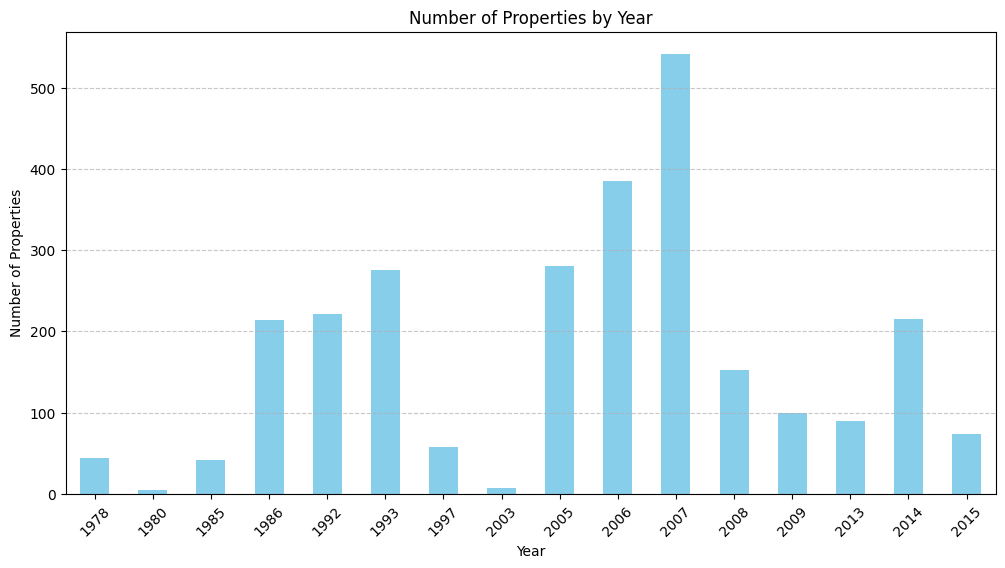

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of apartment
property_count_by_year = df_apartment['YearBuilt'].value_counts().sort_index()

# Show the number of properties by year
print("Number of Properties by year :")
print(property_count_by_year)

# Plot number of properties by year
plt.figure(figsize=(12, 6))
property_count_by_year.plot(kind='bar', color='skyblue')
plt.title("Number of Properties by Year")
plt.xlabel("Year")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-25-cad7e9bf465d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_apartment, x='YearBuilt', y='SalePrice', palette='viridis')


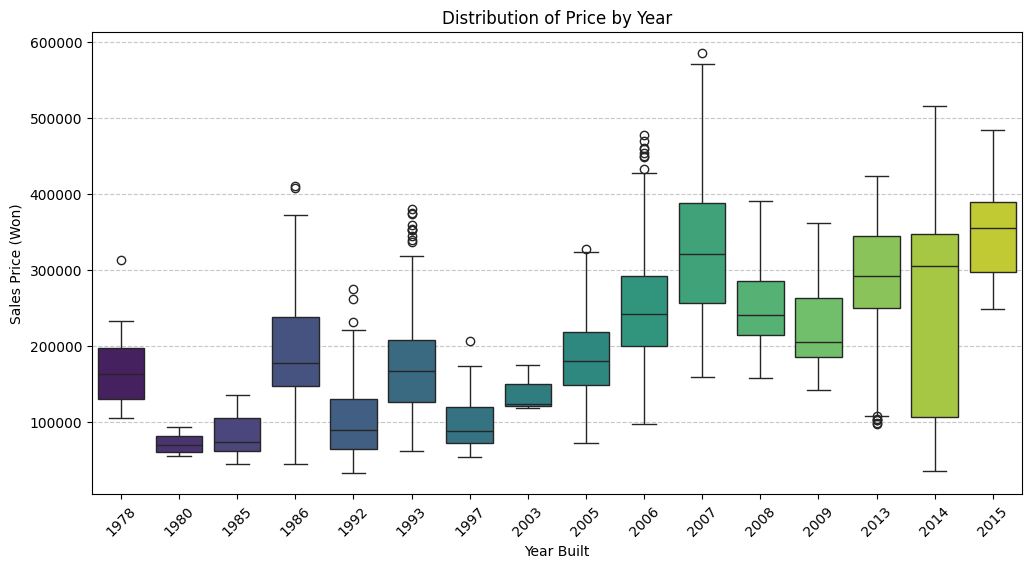

In [25]:
# Distribution of price by Year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_apartment, x='YearBuilt', y='SalePrice', palette='viridis')
plt.title("Distribution of Price by Year")
plt.xlabel("Year Built")
plt.ylabel("Sales Price (Won)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From this data, we can infer that, many apartments were built from 2000s onward.


There's also tendency between Year Built and Sale Price, where the newer apartment (younger Year built) tend to have higher average sales price

## Relation between type (Hallway Type) and average price

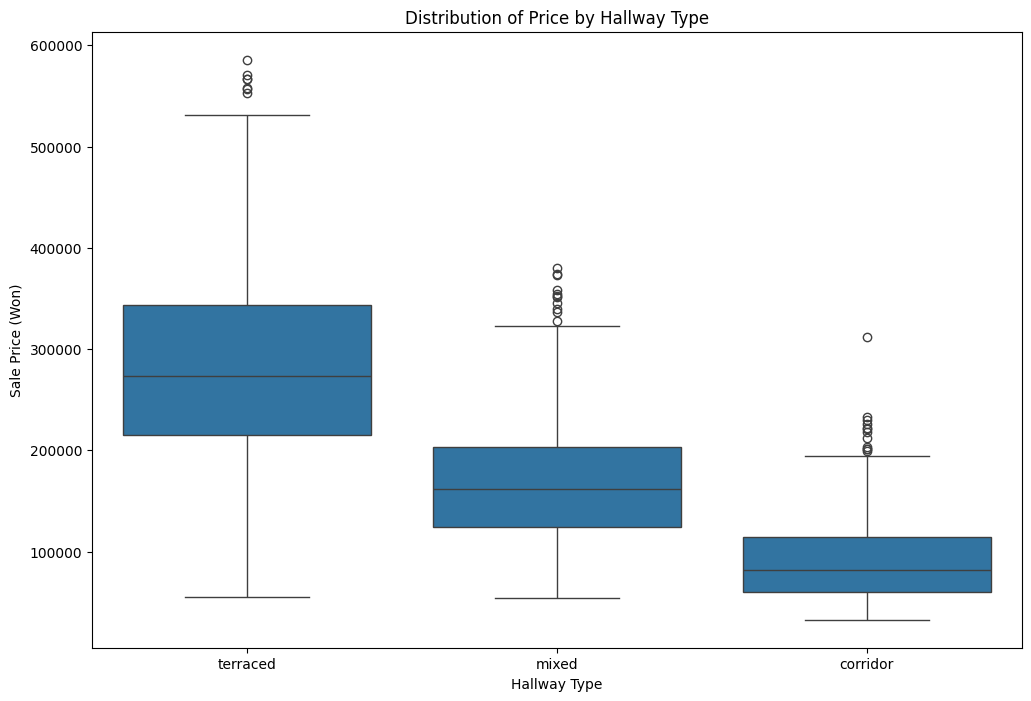

In [26]:
# Visualization of distribution of price vs hallway type
plt.figure(figsize=(12, 8))
sns.boxplot(x='HallwayType', y='SalePrice', data=df_apartment)
plt.title('Distribution of Price by Hallway Type')
plt.xlabel('Hallway Type')
plt.ylabel('Sale Price (Won)')
plt.show()


There's tendency that terraced apartments have higher price compared with other type of hallway.

Followed by Mixed, and the cheapest one is the corridor type

## Relation between number of office nearby to price

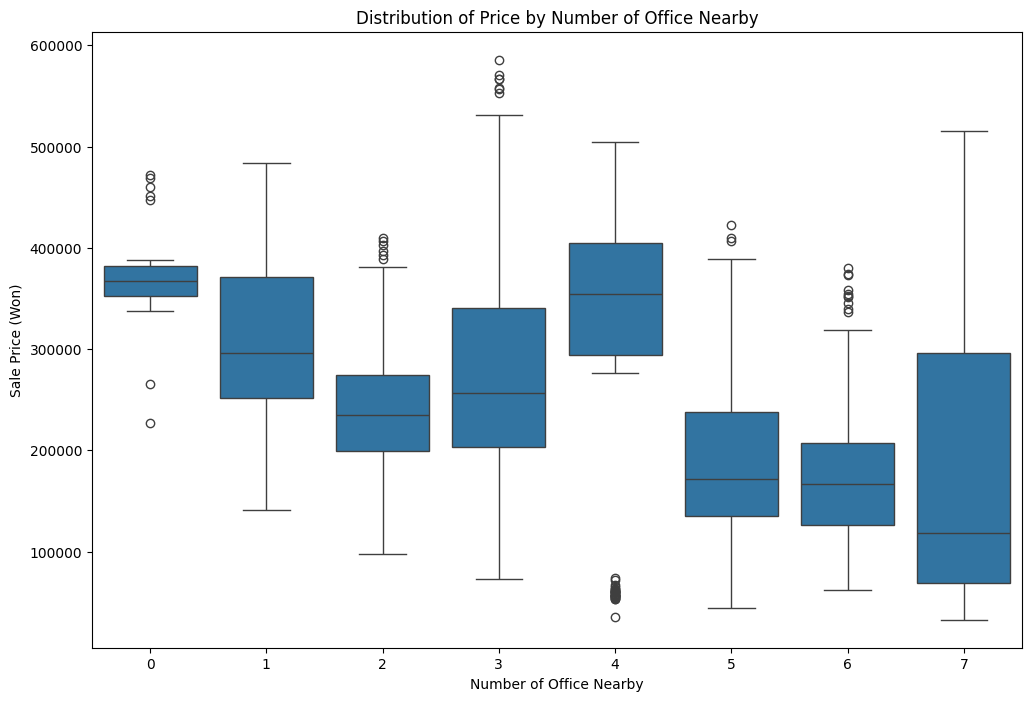

In [27]:
# Visualization of distribution of price vs number of public office nearby

plt.figure(figsize=(12, 8))
sns.boxplot(x='N_FacilitiesNearBy(PublicOffice)', y='SalePrice', data=df_apartment)
plt.title('Distribution of Price by Number of Office Nearby')
plt.xlabel('Number of Office Nearby')
plt.ylabel('Sale Price (Won)')
plt.show()


We can observe that there's trend that the price goes cheaper when there are so many office nearby.

This can be understand that there's possibility user buy apartment quite far from business district to get calmness when they take a rest.

We can also understand that, Daegu is one of center of education in Korea, along with Seoul and Daejeon.

Due to this situation, it's possible that user try to look for calm places to focus on study as well as taking rest.

## Relation between number of university nearby and price

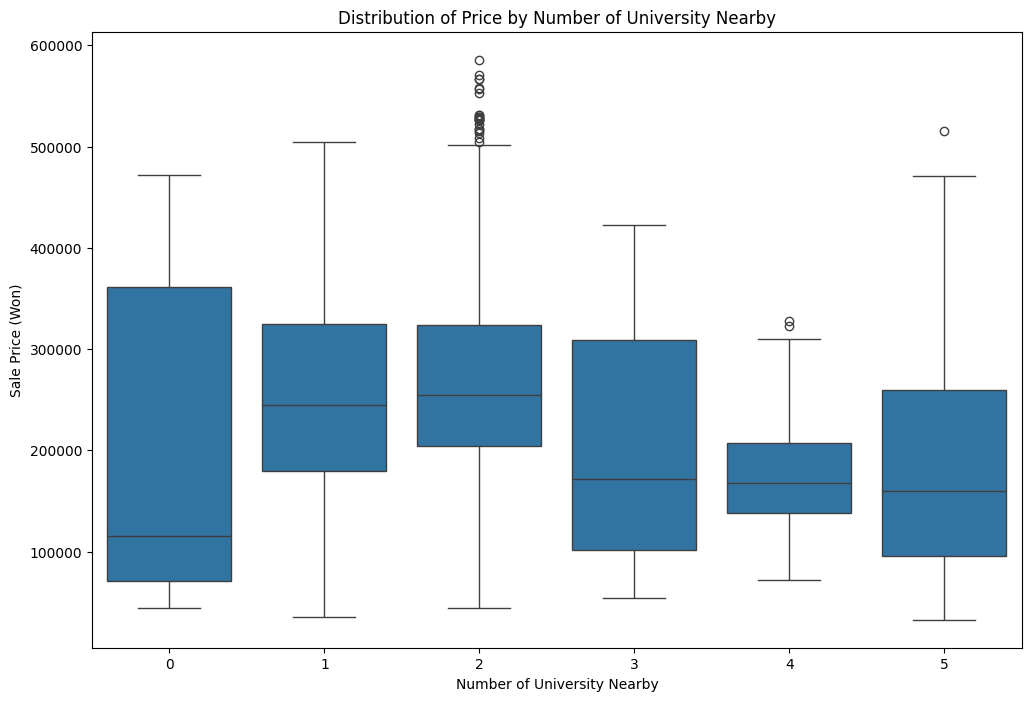

In [28]:
# Visualization of distribution of price vs number of university nearby

plt.figure(figsize=(12, 8))
sns.boxplot(x='N_SchoolNearBy(University)', y='SalePrice', data=df_apartment)
plt.title('Distribution of Price by Number of University Nearby')
plt.xlabel('Number of University Nearby')
plt.ylabel('Sale Price (Won)')
plt.show()


If the apartment near to one or two universities, the price tend to be higher compared with apartments far away from universities

## Relation between number of infrastructures nearby and price

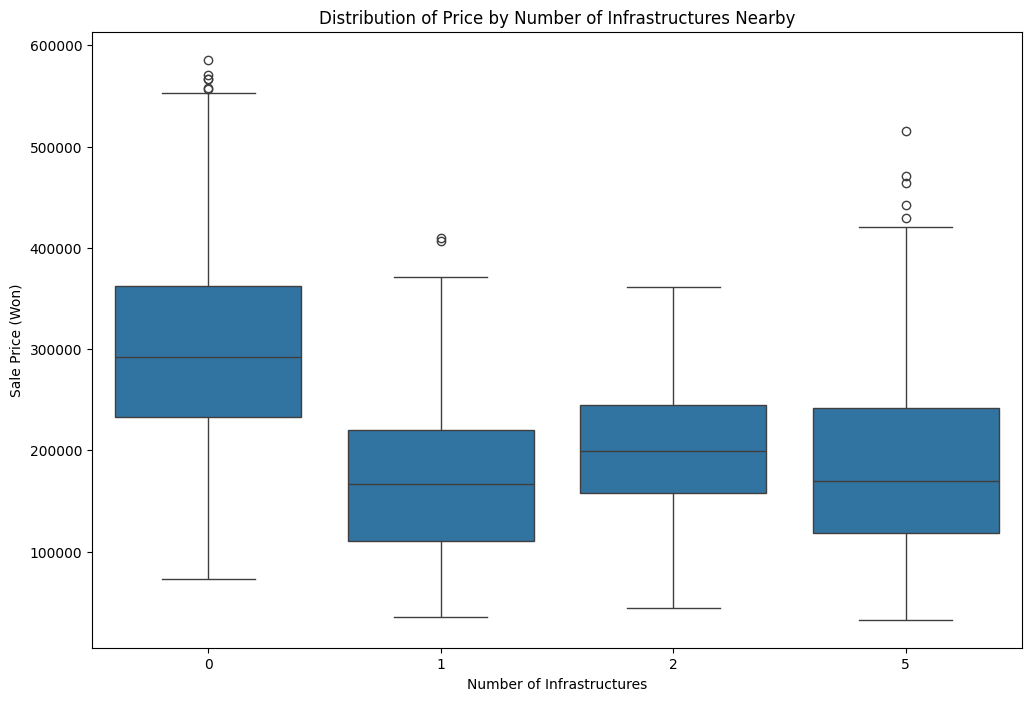

In [29]:
# Visualization of distribution of infrastructure vs price

plt.figure(figsize=(12, 8))
sns.boxplot(x='N_FacilitiesNearBy(ETC)', y='SalePrice', data=df_apartment)
plt.title('Distribution of Price by Number of Infrastructures Nearby')
plt.xlabel('Number of Infrastructures')
plt.ylabel('Sale Price (Won)')
plt.show()


There's no indication that the more the infrastuctures nearby, will strongly affecting the average price (become higher)

## Relation between numbre of basement and price

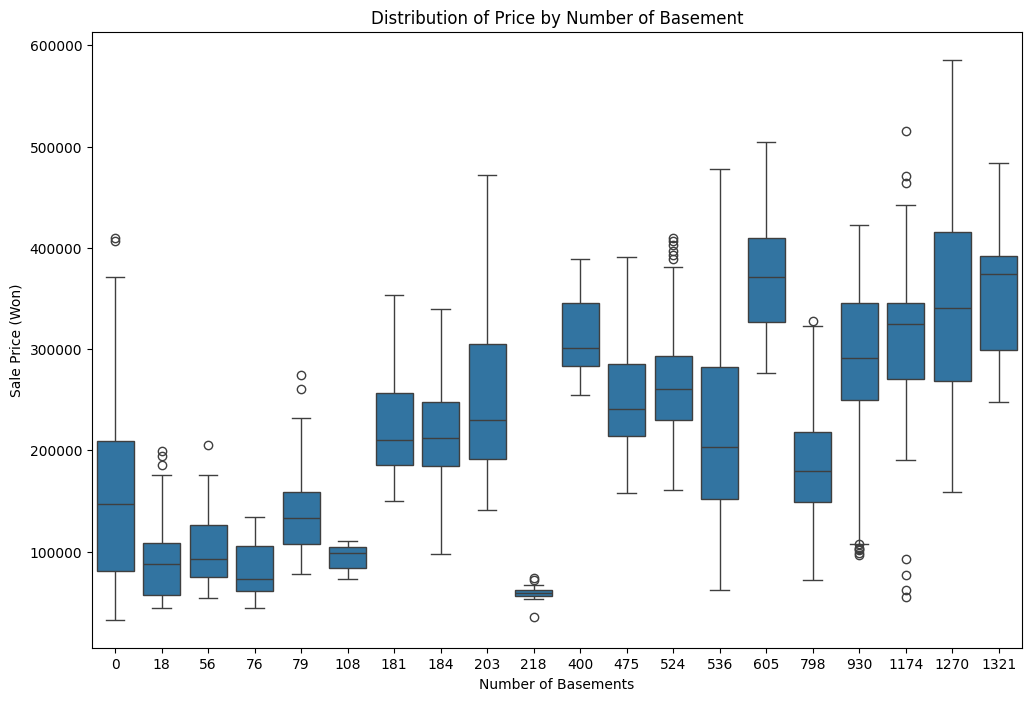

In [30]:
# Visualization of distribution of number of basement and price

plt.figure(figsize=(12, 8))
sns.boxplot(x='N_Parkinglot(Basement)', y='SalePrice', data=df_apartment)
plt.title('Distribution of Price by Number of Basement')
plt.xlabel('Number of Basements')
plt.ylabel('Sale Price (Won)')
plt.show()

In general, we can infer that, the more the number of the parking lot (basements) the price tend to be higher

## Distribution between size of apartments and price

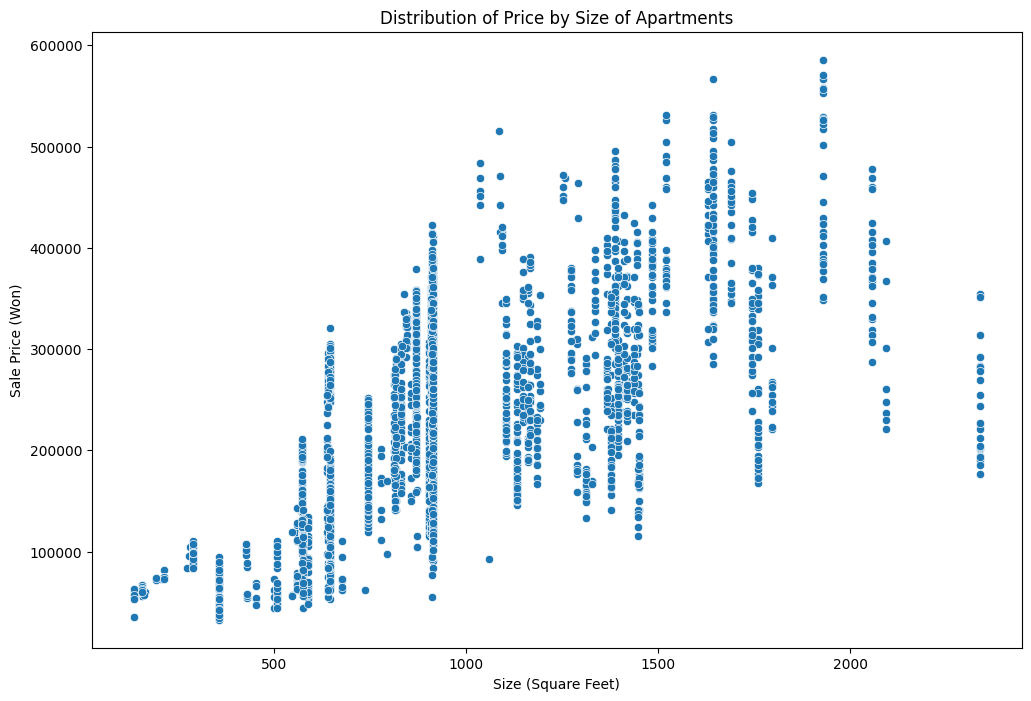

In [31]:
# Visualization of distribution of size and price

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Size(sqf)', y='SalePrice', data=df_apartment)
plt.title('Distribution of Price by Size of Apartments')
plt.xlabel('Size (Square Feet)')
plt.ylabel('Sale Price (Won)')
plt.show()

From this distribution, we can observe that, the price of the apartments tend to be higher if the size is bigger

## Relation between accessibility and price

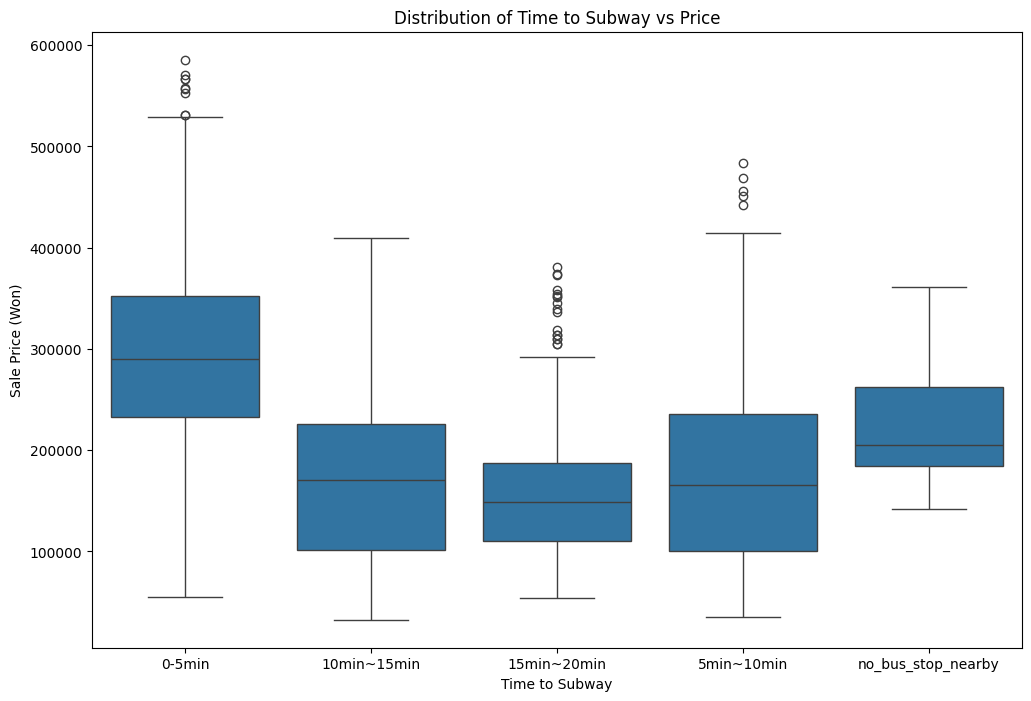

In [32]:
# Visualization of distribution of accessibility and price

plt.figure(figsize=(12, 8))
sns.boxplot(x='TimeToSubway', y='SalePrice', data=df_apartment)
plt.title('Distribution of Time to Subway vs Price')
plt.xlabel('Time to Subway')
plt.ylabel('Sale Price (Won)')
plt.show()

There's tendency that, the closer to the subway, the average price is higher

# DATA PRE-PROCESSING

## Copy Dataset

In [74]:
# COPYING THE DF_APARTMENT INTO APARTMENT DATAFRAME

apartment = df_apartment.copy()

In [75]:
apartment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


## Drop Unrelevant Variables

***Drop 'SubwayStation'***

As this variable shows no effect to the price of apartment

In [76]:
apartment = apartment.drop(columns=['SubwayStation'])

In [77]:
apartment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 3   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 4   N_SchoolNearBy(University)        2701 non-null   int64 
 5   N_Parkinglot(Basement)            2701 non-null   int64 
 6   YearBuilt                         2701 non-null   int64 
 7   N_FacilitiesInApt                 2701 non-null   int64 
 8   Size(sqf)                         2701 non-null   int64 
 9   SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 232.1+ KB


## Split Features (X) and Target (Y) dataset

Split X and Y dataframe.



In [244]:
# We will create X and Y

# Where X is the variable for features

# Y is the target


X = apartment.drop(columns = ['SalePrice'])
Y = apartment['SalePrice']

In [245]:
X.head(5)

,HallwayType,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,terraced,0-5min,0,3,2,1270,2007,10,1387
1,terraced,10min~15min,1,5,1,0,1986,4,914
2,mixed,15min~20min,1,7,3,56,1997,5,558
3,mixed,5min~10min,5,5,4,798,2005,7,914
4,terraced,0-5min,0,1,2,536,2006,5,1743


In [80]:
Y.head(5)

,SalePrice
0,346017
1,150442
2,61946
3,165486
4,311504


## Scaling Data Check

We know that some of dataset, like Size, Year  use the units larger if we compared to other variables.


Due to this situation we need to do scaling later in processing the data.


Before doing the scaling later, we need to understand first, what is the distribution of those variables, so we can choose the right scaling method.

***Scaling will be done for Year, and Size, since these variables shows huge different in numerical compared to other variables***

### Price Distribution Check

We would like to check how is the price distribution, how about outlier.

Based on these informations we can understand the limitation of our model

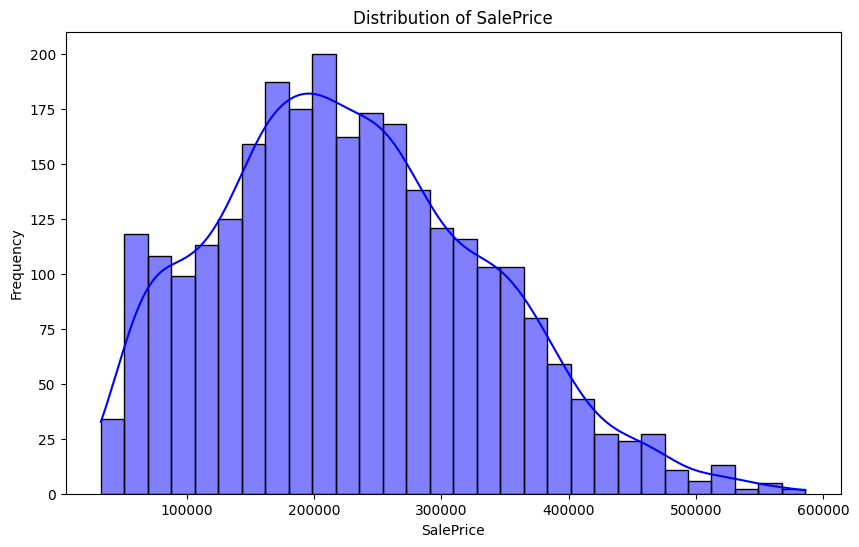

In [239]:
# Plotting the distribution of the SalePrice variable
plt.figure(figsize=(10, 6))
sns.histplot(Y, kde=True, color='blue', bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [240]:
# Calculate the IQR
Q1 = Y.quantile(0.25)
Q3 = Y.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = Y[(Y < lower_bound) | (Y > upper_bound)]

# Count the number of outliers
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Upper Price: {upper_bound}")
print(f"Lower Price: {lower_bound}")

Number of outliers: 17
Upper Price: 521901.5
Lower Price: -67478.5


The data shows skewed distribution.

**We can say that the limitation of our model will be good for price under 521,900 WON**

### Distribution Check for Year

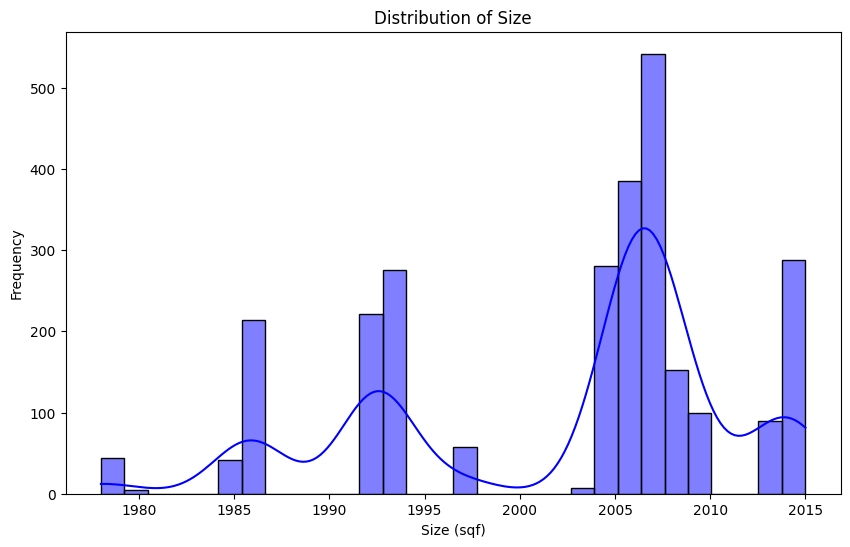

In [241]:
# Plotting the distribution of the YearBuilt variable
plt.figure(figsize=(10, 6))
sns.histplot(X['YearBuilt'], kde=True, color='blue', bins=30)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

### Distribution Check for Size

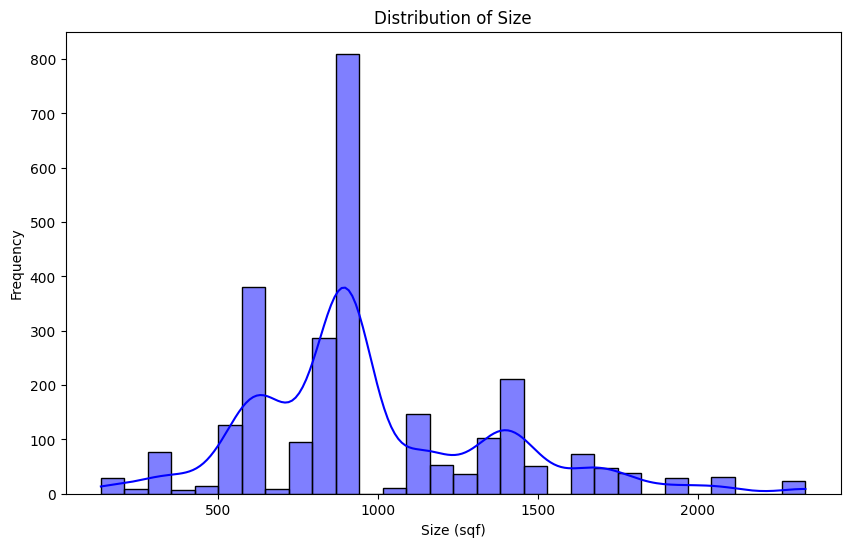

In [242]:
# Plotting the distribution of the Size variable
plt.figure(figsize=(10, 6))
sns.histplot(X['Size(sqf)'], kde=True, color='blue', bins=30)
plt.title('Distribution of Size')
plt.xlabel('Size (sqf)')
plt.ylabel('Frequency')
plt.show()

In [243]:
# Calculate the IQR
Q1 = X['Size(sqf)'].quantile(0.25)
Q3 = X['Size(sqf)'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = X[(X['Size(sqf)'] < lower_bound) | (X['Size(sqf)'] > upper_bound)]

# Count the number of outliers
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Upper Size: {upper_bound}")
print(f"Lower Size: {lower_bound}")

Number of outliers: 84
Upper Size: 1803.0
Lower Size: 107.0


Distribution density shows the data tend to skewed to the right.

From the outlier check, we can imply that

**Our model works for best for size between 107 - 1803 sqft**

Based on the distribution, we can use the Min-Max scaling to scale the data

# MODELING

In [246]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Train - Test Split

We do the Train - Test split before any other processing, like encoding, caling.

This approach made to prevent any information leakage.

In [247]:
# Split become train dan test (70:30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [248]:
X_train.head(5)

,HallwayType,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
1983,terraced,0-5min,0,3,2,1270,2007,10,868
213,mixed,15min~20min,5,6,5,536,1993,4,1288
1390,mixed,15min~20min,5,6,5,536,1993,4,1761
2788,terraced,0-5min,0,2,2,524,2007,4,1103
123,terraced,0-5min,0,3,2,475,2008,8,914


## Encoding

In [249]:
# create new X that contains encoded variables

X_train_transformed = pd.get_dummies(X_train, columns=['HallwayType', 'TimeToSubway'], drop_first=True)
X_test_transformed = pd.get_dummies(X_test, columns=['HallwayType', 'TimeToSubway'], drop_first=True)

In [250]:
# to make sure the encoded data recorded as integer 0 and 1, not the boolean
X_train_transformed = X_train_transformed.astype(int)
X_test_transformed = X_test_transformed.astype(int)

In [251]:
X_train_transformed.head()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_mixed,HallwayType_terraced,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
1983,0,3,2,1270,2007,10,868,0,1,0,0,0,0
213,5,6,5,536,1993,4,1288,1,0,0,1,0,0
1390,5,6,5,536,1993,4,1761,1,0,0,1,0,0
2788,0,2,2,524,2007,4,1103,0,1,0,0,0,0
123,0,3,2,475,2008,8,914,0,1,0,0,0,0


In [252]:
X_test_transformed.head()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_mixed,HallwayType_terraced,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
2927,0,3,2,1270,2007,10,1643,0,1,0,0,0,0
1427,0,1,2,536,2006,5,1149,0,1,0,0,0,0
2081,5,5,4,798,2005,7,914,1,0,0,0,1,0
352,0,2,2,524,2007,4,1419,0,1,0,0,0,0
1861,1,7,3,56,1997,5,914,1,0,0,1,0,0


## Scaling

SIZE SCALING

In [253]:
# Initialize the scaler
scaler = MinMaxScaler()

# Scale the 'Size(sqf)' column
X_train_transformed['Size(sqf)'] = scaler.fit_transform(X_train_transformed[['Size(sqf)']])
X_test_transformed['Size(sqf)'] = scaler.transform(X_test_transformed[['Size(sqf)']])

Year Scaling

In [254]:
# Initialize the scaler
scaler = MinMaxScaler()

# Scale the 'Size(sqf)' column
X_train_transformed['YearBuilt'] = scaler.fit_transform(X_train_transformed[['YearBuilt']])
X_test_transformed['YearBuilt'] = scaler.transform(X_test_transformed[['YearBuilt']])

In [255]:
X_train_transformed.head(5)

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_mixed,HallwayType_terraced,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
1983,0,3,2,1270,0.783784,10,0.332879,0,1,0,0,0,0
213,5,6,5,536,0.405405,4,0.523615,1,0,0,1,0,0
1390,5,6,5,536,0.405405,4,0.738420,1,0,0,1,0,0
2788,0,2,2,524,0.783784,4,0.439600,0,1,0,0,0,0
123,0,3,2,475,0.810811,8,0.353769,0,1,0,0,0,0


In [256]:
X_test_transformed.head(5)

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),HallwayType_mixed,HallwayType_terraced,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
2927,0,3,2,1270,0.783784,10,0.684832,0,1,0,0,0,0
1427,0,1,2,536,0.756757,5,0.460490,0,1,0,0,0,0
2081,5,5,4,798,0.729730,7,0.353769,1,0,0,0,1,0
352,0,2,2,524,0.783784,4,0.583106,0,1,0,0,0,0
1861,1,7,3,56,0.513514,5,0.353769,1,0,0,1,0,0


## CORRELATION CHECK

We will check the correlation matrix for the variables along with the encoded data

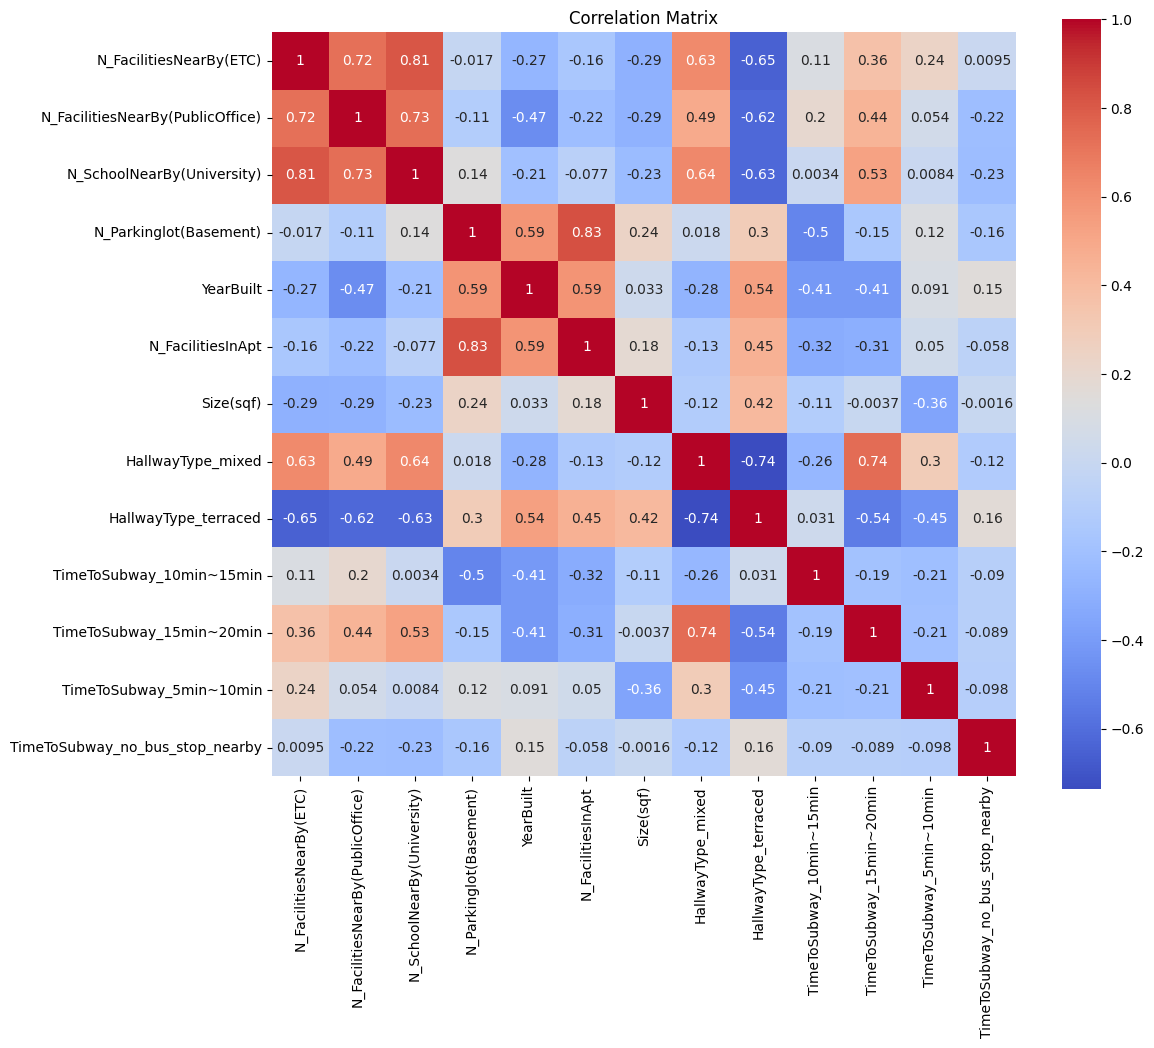

In [257]:
correlation_matrix = X_train_transformed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix we observe strong correlation between Number of Facilities with Number of Public Office, Number of University.

This relation can be understand, in real case, when there are may infrastructure, usually there are also office/business activities, and there's also possibilites university or school.


We also notice, the high correlation between Facilities in Apartment and Year Built, this can be understand, it's possible that the new apartment can have more complete facilities.

High correlation between Number of Parking Lot and number of facilities. This is also reasonable, the larger the parking lot, indicating the larger the apartment. Large apartment could have more complete facilities compared to the small ones.

To check the hypothesis whether we need the parameters or not.

We can utilize the OLS package

## OLS Model

In [258]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pickle

# 1. Tambahkan Intercept ke X_train_transformed untuk OLS
X_train_transformed_ols = sm.add_constant(X_train_transformed)
X_test_transformed_ols = sm.add_constant(X_test_transformed)

# 2. Fit Model OLS
ols_model = sm.OLS(Y_train, X_train_transformed_ols).fit()

# 3. Prediksi pada Data Test
Y_pred = ols_model.predict(X_test_transformed_ols)

# 4. Hitung Metrik Evaluasi
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
r_squared = ols_model.rsquared

# 5. Cetak Hasil
print("Model Summary:\n", ols_model.summary())
print("\nEvaluation Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared: {r_squared:.4f}")



Model Summary:
                             OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     449.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:29:36   Log-Likelihood:                -23213.
No. Observations:                1890   AIC:                         4.645e+04
Df Residuals:                    1876   BIC:                         4.653e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

From the OLS check, we can infer that the model need the beta_0, beta_1, ... ,etc

If we use linear model, we can handle around 75% variants of the test dataset.

With the predicted price can be varies around 22.7% with the actual price.

In this model, we also obsever some variables shows strong correlatio.

Considering in correlation check before, some variables correlated strongly, we need to go futher to check the VIF value.

## VIF Check

In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Add a constant column for VIF calculation
X_train_constant = sm.add_constant(X_train_transformed)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X_train_constant.columns
vif["VIF"] = [variance_inflation_factor(X_train_constant.values, i) for i in range(X_train_constant.shape[1])]

print(vif)


                             Feature        VIF
0   const                             80.536712
1   N_FacilitiesNearBy(ETC)           6.129521 
2   N_FacilitiesNearBy(PublicOffice)  3.375525 
3   N_SchoolNearBy(University)        9.151906 
4   N_Parkinglot(Basement)            7.381756 
5   YearBuilt                         3.649984 
6   N_FacilitiesInApt                 4.739543 
7   Size(sqf)                         1.847323 
8   HallwayType_mixed                 7.106449 
9   HallwayType_terraced              10.647448
10  TimeToSubway_10min~15min          2.600581 
11  TimeToSubway_15min~20min          5.836365 
12  TimeToSubway_5min~10min           5.318494 
13  TimeToSubway_no_bus_stop_nearby   1.576657 


From the VIF check, we obtain that many variables have strong multicollinearity.


Droping these variables is not a wise choice, since it can result to underfitting model that can't represent most of the variants.



## RIDGE - LASSO regression

To handle the multicollinearity, we will try to use Ridge and Lasso model.

Ridge and Lasso works by minimizing the effect of variables in model, and for Lasso can also turn the slope for certain variables become 0. Because of their nature, we can utilize Ridge and Lasso that perform better to handle mutlicollinearity.

In [263]:
# RIDGE MODEL

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 1. Define Ridge Model and Hyperparameter Grid
ridge = Ridge()
alpha_values = np.logspace(-4, 4, 50)  # Alpha from 10^-4 to 10^4
param_grid = {'alpha': alpha_values}

# 2. Do Grid searc to tune the hyperparameter
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_transformed, Y_train)

# 3. Select the best ridge model
best_ridge = grid_search.best_estimator_

# 4. Predict Y with the best model
Y_pred = best_ridge.predict(X_test_transformed)

# 5. Calculate the evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
r_squared = r2_score(Y_test, Y_pred)

# 6. Printing the metrics
print("Best Alpha:", grid_search.best_params_['alpha'])
print("\nEvaluation Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared: {r_squared:.4f}")


Best Alpha: 0.12648552168552957

Evaluation Metrics:
MSE: 2877037500.2126
MAE: 44043.1977
MAPE: 22.78%
R-squared: 0.7286


In [264]:
# LASO MODEL

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import matplotlib.pyplot as plt

# 1. Define Laso model and Grid for Hyperparameter tuning
lasso = Lasso()
alpha_values = np.logspace(-4, 4, 50)  # Alpha from 10^-4 to 10^4
param_grid = {'alpha': alpha_values}

# 2. Do Grid Search to tune the hyperparameter
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_transformed, Y_train)

# 3. Select the best Lasso Model
best_lasso = grid_search.best_estimator_

# 4. Predict Y with Lasso
Y_pred = best_lasso.predict(X_test_transformed)

# 5. Calculate the Evaluation Metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
r_squared = r2_score(Y_test, Y_pred)

# 6. Print the Metrics
print("Best Alpha:", grid_search.best_params_['alpha'])
print("\nEvaluation Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared: {r_squared:.4f}")


Best Alpha: 5.428675439323859

Evaluation Metrics:
MSE: 2877225897.5848
MAE: 44045.3821
MAPE: 22.77%
R-squared: 0.7286


### PCA in Ridge - Lasso

We understand that there are strong multicollinearity for many variables.

We try to make the model become more accurate.

One of the way to reduce multicolinearity is using PCA model.

In this segment, we'll try to use PCA for features that will be used in Ridge and Lasso

**PCA in Ridge**

In [267]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Standardization for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

#  Implement PCA
pca = PCA(n_components=0.95)  # Choose variables that representing 95% of the data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Ridge Regression with Hyperparameter Tuning
ridge = Ridge()
ridge_param_grid_pca = {'alpha': np.logspace(-4, 4, 50)}
ridge_grid_search_pca = GridSearchCV(ridge, ridge_param_grid_pca, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search_pca.fit(X_train_pca, Y_train)

# Ridge Best Model
best_ridge_model_pca = ridge_grid_search_pca.best_estimator_
print(f"Best Ridge Alpha: {ridge_grid_search_pca.best_params_['alpha']}")

# Predict with Best Model
ridge_y_pred_pca = best_ridge_model_pca.predict(X_test_pca)

# Calculate Evaluation Metrics for Ridge
ridge_mse_pca = mean_squared_error(Y_test, ridge_y_pred_pca)
ridge_mae_pca = mean_absolute_error(Y_test, ridge_y_pred_pca)
ridge_mape_pca = np.mean(np.abs((Y_test - ridge_y_pred_pca) / Y_test)) * 100
ridge_r_squared_pca = r2_score(Y_test, ridge_y_pred_pca)

#Print Evaluation Metrics
print("\nRidge Regression (Best Model):")
print(f"MSE: {ridge_mse_pca:.4f}")
print(f"MAE: {ridge_mae_pca:.4f}")
print(f"MAPE: {ridge_mape_pca:.2f}%")
print(f"R-squared: {ridge_r_squared_pca:.4f}")

Best Ridge Alpha: 11.513953993264458

Ridge Regression (Best Model):
MSE: 2995335180.0031
MAE: 44675.3851
MAPE: 22.56%
R-squared: 0.7174


**PCA in Lasso**

In [268]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Standardization for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

#  Implement PCA
pca = PCA(n_components=0.95)  # Choose variables that representing 95% of the data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Lasso Regression with Hyperparameter Tuning
lasso = Lasso()
lasso_param_grid_pca = {'alpha': np.logspace(-4, 4, 50)}
lasso_grid_search_pca = GridSearchCV(lasso, lasso_param_grid_pca, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search_pca.fit(X_train_pca, Y_train)

# Best Lasso Model
best_lasso_model_pca = lasso_grid_search_pca.best_estimator_
print(f"Best Lasso Alpha: {lasso_grid_search_pca.best_params_['alpha']}")

# Predict with Best Model
lasso_y_pred_pca = best_lasso_model_pca.predict(X_test_pca)

# Calculate Evaluation Metrics for Lasso
lasso_mse_pca = mean_squared_error(Y_test, lasso_y_pred_pca)
lasso_mae_pca = mean_absolute_error(Y_test, lasso_y_pred_pca)
lasso_mape_pca = np.mean(np.abs((Y_test - lasso_y_pred_pca) / Y_test)) * 100
lasso_r_squared_pca = r2_score(Y_test, lasso_y_pred_pca)

#Print Evaluation Metrics
print("\nLasso Regression (Best Model):")
print(f"MSE: {lasso_mse_pca:.4f}")
print(f"MAE: {lasso_mae_pca:.4f}")
print(f"MAPE: {lasso_mape_pca:.2f}%")
print(f"R-squared: {lasso_r_squared_pca:.4f}")

Best Lasso Alpha: 0.0001

Lasso Regression (Best Model):
MSE: 2994459892.9225
MAE: 44655.4985
MAPE: 22.53%
R-squared: 0.7175


In [266]:
# 10. Plot Hubungan antara Alpha dan MSE untuk Ridge
#plt.figure(figsize=(10, 6))
#plt.plot(ridge_grid_search.cv_results_['param_alpha'], -ridge_grid_search.cv_results_['mean_test_score'], label='Ridge MSE')
#plt.xscale('log')
#plt.xlabel('Alpha')
#plt.ylabel('Mean Squared Error')
#plt.title('Ridge Regression: Alpha vs MSE')
#plt.grid(True)
#plt.legend()
#plt.show()

# 11. Plot Hubungan antara Alpha dan MSE untuk Lasso
#plt.figure(figsize=(10, 6))
#plt.plot(lasso_grid_search.cv_results_['param_alpha'], -lasso_grid_search.cv_results_['mean_test_score'], label='Lasso MSE')
#plt.xscale('log')
#plt.xlabel('Alpha')
#plt.ylabel('Mean Squared Error')
#plt.title('Lasso Regression: Alpha vs MSE')
#plt.grid(True)
#plt.legend()
#plt.show()

### BEST LINEAR MODEL

Comparisons of Ridge and Lasso, with and Without PCA

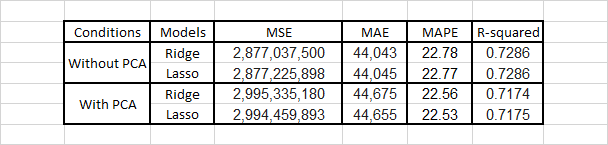

***Best Model Analysis:***

Based on MSE, both Ridge and Lasso without PCA show the best results, as their MSE is lower compared to the results with PCA.


The R-squared value shows a decrease in the model with PCA, which means the model with PCA does not explain the data variance as well as the model without PCA.


Since MSE and R-squared are two important indicators in regression, the Ridge or Lasso models without PCA are the best among the four models, as they yield lower MSE and higher R-squared.

Thus, for this case, Ridge without PCA or Lasso without PCA is the best choice.


From Ridge vs Lasso, we can choose ***Ridge without PCA as our best model***

## ALTERNATIVE MODEL : TREE-BASED REGRESSOR

We understand that the linear model is very prone to mutlicollinearity and it still results in differnce around 22.7% difference of price if we use the model to check the situation in the market.



To find more accurate model, we try to observe severeal Tree-Based regressor model.

This decision made considering that tree model generally works by deviding the data into several cluster/groups, and make the prediction based on the average value of the groups.

This method can help to minimize the effect of multicollinearity, as the data grouped based on their likeliness

There are several model that we will try to observe.

- Decission Tree Regressor.
- Random Forest Regressor
- XGBoost Regressor.


***Since tree-based algorithm is not affected by scaling, we can use the previously processed data X_train_transformed and X_test_transformed***

### Decission Tree Regressor

In [284]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle



# Initiate the Decission Tree Regressor with default parameters
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train model with training dataset
dt_regressor.fit(X_train_transformed, Y_train)

# Predict test data with model
Y_pred = dt_regressor.predict(X_test_transformed)

# Calculate the evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")



Mean Squared Error (MSE): 2284448665.41364
R-squared: 0.7844951631279246
Mean Absolute Error (MAE): 38741.805362646606
Mean Absolute Percentage Error (MAPE): 19.811006995870624%


### Random Forest Regressor

In [286]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle


# Initiate Random Forest Regressor with default parameters
rf_regressor = RandomForestRegressor(random_state=42)

# Train the Random Forest model
rf_regressor.fit(X_train_transformed, Y_train)

# Prediksi pada data test
Y_pred = rf_regressor.predict(X_test_transformed)

# Calculate the evaluation metrics (MSE, R-squared, MAE, MAPE)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Squared Error (MSE): 2253287015.350401
R-squared: 0.78743481610206
Mean Absolute Error (MAE): 38649.23099564069
Mean Absolute Percentage Error (MAPE): 19.679924226696897%


### XGBOOST Regressor

In [288]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle


# Inititate XGBoost Regressor with default parameters
xgb_regressor = XGBRegressor(random_state=42)

# Train the XGBoost model
xgb_regressor.fit(X_train_transformed, Y_train)

# Predit the test value
Y_pred = xgb_regressor.predict(X_test_transformed)

# Calculate the evaluation metrics (MSE, R-squared, MAE, MAPE)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Squared Error (MSE): 2247225394.3807282
R-squared: 0.7880066633224487
Mean Absolute Error (MAE): 38630.055149892105
Mean Absolute Percentage Error (MAPE): 19.61565656018785%


### Tree-Based Model Conclussion

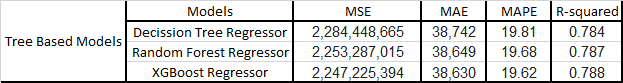

- From the three commonly used tree-based regressor, we can see that XGBoost Regressors shows the smallest MSE and MAE, indicating this model can predict the test closer to the actual value.

- We also observe that R-squared is larger for XGBoost, indicating this model can predict more variants in data compard to other two models.

- The MAPE also shows better performance, indicating that the XGBoost can predict with more accuracy compared to DT and Random Forest.

## BEST MODEL HYPERPARAMETER TUNING

From the tree-based model, we can see that the XGBoost is the model that can predict more accurately.

This model can result in smaller MAE, MSE, and MAPE.



We find from the literatures, there are several hyperparameters that can be tuned to increase the accuracy of the XGBoost

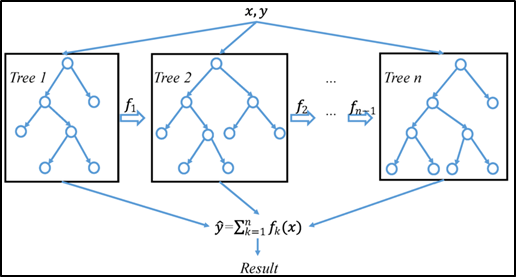

***1. n_estimators:*** The number of trees to build in the model.

***2. learning_rate:*** The step size used to update the model during training.

***3. max_depth:*** The maximum depth allowed for each tree.
A range is chosen to balance overfitting while still capturing complex patterns.


***4. subsample:*** The fraction of the training data used to build each tree. Values are selected to test whether using a portion of the data improves generalization.

***5. colsample_bytree:***The fraction of features used to build each tree. Values are chosen to limit the features used, reducing the risk of overfitting.

***6. gamma:*** A parameter that controls tree splits: the higher the value of gamma, the harder it is for the tree to split a node. A range  is chosen to balance tree complexity and accuracy.

In [301]:

# Make parameters for tunning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initiate XGBoost Model
xgb_regressor = XGBRegressor(random_state=42)

# Use Gridsearch to find the optimal parameter tuning
grid_search_xgboost = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5,
                           verbose=2, n_jobs=-1)

# Train the model with the parameters
grid_search_xgboost.fit(X_train_transformed, Y_train)

# Choose the best model based on Grid Search
xgboost_best_model = grid_search_xgboost.best_estimator_

# Predict the test data
Y_pred = xgboost_best_model.predict(X_test_transformed)

# Calculate the evaluation metrics (MSE, R-squared, MAE, MAPE) for the best model

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# Print the evaluation metrics
print(f"Best Hyperparameters: {grid_search_xgboost.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")




Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error (MSE): 2211372438.479086
R-squared: 0.7913888692855835
Mean Absolute Error (MAE): 38444.4379961082
Mean Absolute Percentage Error (MAPE): 19.602306678559124%


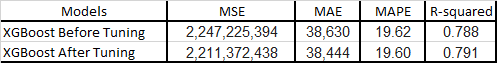

There is increment of accuracy after the XGBoost model tuned, can be seen from the smaller value of MSE, MAE, and MAPE.


In [303]:
# Save the best XGboost Model in Pickle

with open('best_xgboost_regressor_model.pkl', 'wb') as f:
    pickle.dump(xgboost_best_model, f)

### Residual Check

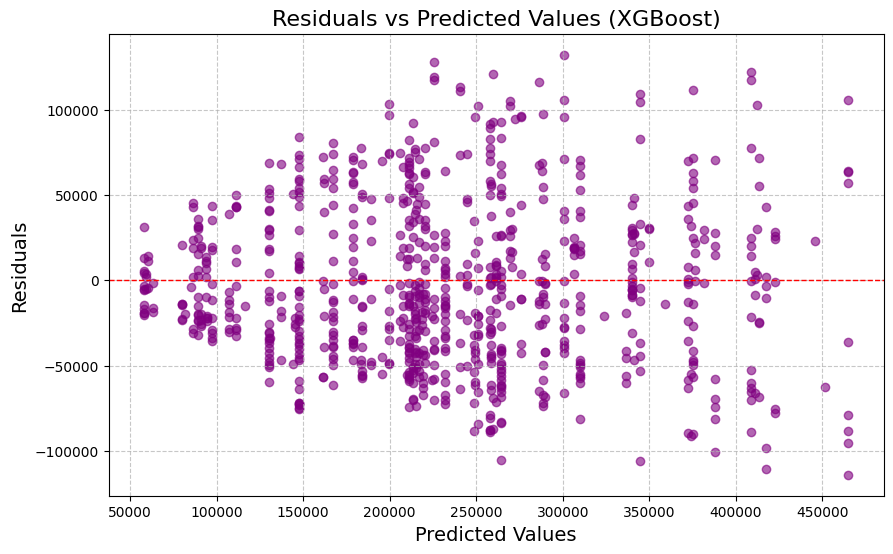

In [305]:
import matplotlib.pyplot as plt

# Hitung residuals dari hasil prediksi XGBoost
residuals = Y_test - Y_pred

# Visualisasi residuals vs prediksi
plt.figure(figsize=(10, 6))

# Scatter plot residuals
plt.scatter(Y_pred, residuals, alpha=0.6, color='purple')

# Tambahkan garis nol untuk referensi
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

# Tambahkan judul dan label
plt.title('Residuals vs Predicted Values (XGBoost)', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()


The heteroskedasticity observed in our regression results is likely caused by a non-normal distribution of the target variable, non-linear relationships not fully captured by the model, or the presence of significant outliers.



# ***CONCLUSSION***

**Context and Business Issue :**

- Apartments serve as a primary solution to housing needs in urban environments, especially due to limited land availability and high levels of business activity.

- Apartment prices are significantly influenced by various internal factors (e.g., size, facilities within the apartment) and external factors (e.g., proximity to public facilities and transportation).

- The goal of this analysis is to understand and predict apartment prices to help property owners and buyers set prices that align with market conditions


**Evaluation metrics that used are MSE, MAE, MAPE, and R-squared :**

- MSE  to check the error in quadratic terms, this metric is usefull when evaluating the effect of large residual data to overall model. The larger MSE, means the larger difference (gap) between test and residual. This metrics used when we tune the parameters to see which parameters are suitable to minimize the large error.

- MAE is used to check the absolut difference between actual test set and predicted values, it’s quite the same with MSE, but the MSE will give us more intuitive approach, as this fact show the average distance/gap between actual test and predicted data.

- MAPE is used to see the difference of predicted data vs actual test data in percent. This is usefull fact especially for the stakeholders as they can know that the accuracy of the model may predict the price around X% difference than the actual.

- R-squared, this facts can tell us how good the model to represent the variance of the data.

**Data Preprocessing :**

- In processing the data we delete the duplicates as these data have no impact to the normality (distribution), hence maintaining these duplicates will not give any usefull additional informations and tend to consume our storage more.


- We split the test and train data before doing any encoding and scaling, this method chose to minimize the information leakage to the test data.


- The encoding used is get.dummies from pandas, considering the categorical data is not more than 5 categories, hence the dummies already sufficient.


- The scaling happened for Year and Size parameters, as these parameters scale are comparably much higher compared to other variables.

- The scaling method used is Min-Max scaller, this method chose considering the distribution of the parameters that is not normally distributed and tend to right-skewed.




**Model:**

- Based on the data distribution and considering the outlier, we can set the confident level for our model to work the best when the data is within the range of **Price under 521,900 WON. Year Built of apartment from 1980 to 2015, and size of apartment between 107 - 1803 sqft**


- We tried to utilize several methods, the linear model and the tree-based regressor.

- The model started from Linear Model utilizing simple linear regeression, Ridge and Lasso.

- Our data show multicollinearity between the variables, hence we try to conside tree-based regressor that are able to handle multicollinearity better.

- From our oubservation, the Ridge with hyperparameter tuning is the best for Linear Model, while XGBoost is the best model for tree-based regressor, as the tree

- Among these models, we found that the **XGboost regressor is the best model to predict the price.**



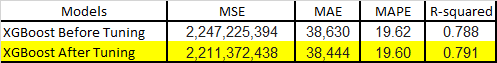

XGboost regressor able to ***represent around 79.1 of the data variances with the price accuracy about 19.6%*** (the price can varies around 19.6% from the actual price)

# RECOMMENDATION

Despite of the XGBoost model able to show more accuracy, we still obseve the heteroskedasticity observed in our regression results is likely caused by a non-normal distribution of the target variable, non-linear relationships not fully captured by the model, or the presence of significant outliers.

____

Several things that we can consider to increase further our model

1. Try to make more sampling data, the more the sampling data, hopefully the data become more normally distributed.

2. Try to drop the significant outliers that may dragging up our predicted value hence affecting the MSE

3. We understand that the size, price scale varies so much, for example in our range itself the price varies from <500 up to > 600,000 Won, and the size varies from <50 sqft up to >2,000 sqft. Tranforming these variables into log scale can help to minimize the variance of the data. We can transform them when modeling, fitting and predicting the data, after the prediction obtained, we can transformed back the log into numerical scale.


4. We can try to consider to have more robust variables, for example, the variable number of other facilities, it's not clear what type of facilities captured. If we have more detailed iformation, like the number of shopping mall or minimarket, we can use our domain knowldge better to choose the more important features.
